**YOUR NAME HERE**

CS 251: Data Analysis and Visualization

Fall 2023

Project 4: Principal Component Analysis

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [163]:
df = pd.read_csv('data/iris.csv')
df_numeric = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
print(df_numeric.head())

   sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

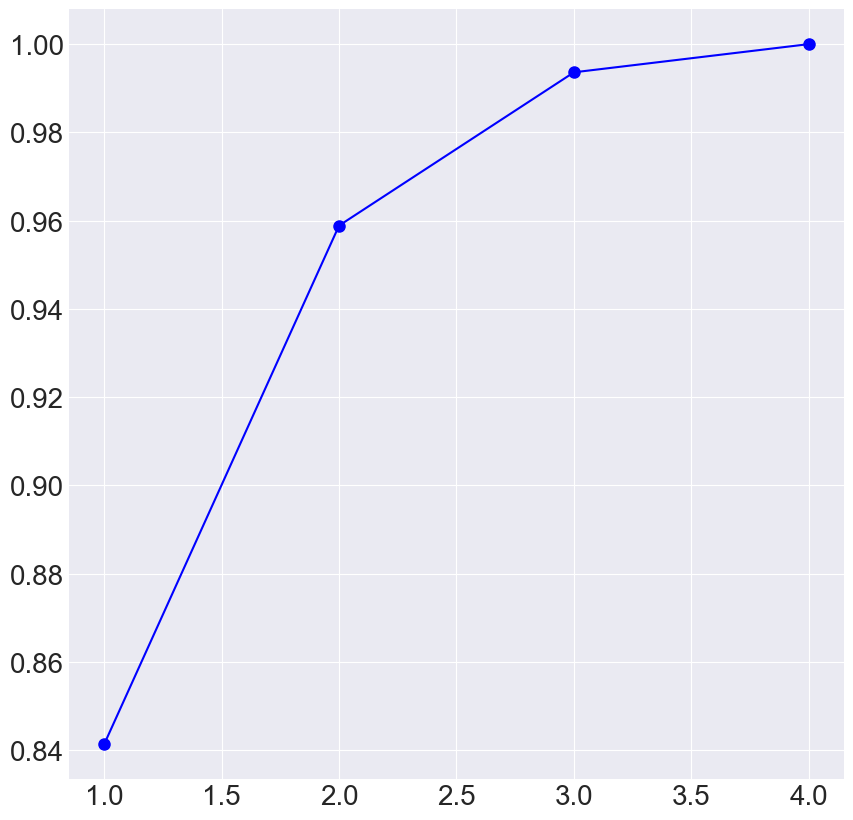

In [164]:
df_numeric_pca = pca.PCA(data=df_numeric)
headers = list(df_numeric.columns)
df_numeric_pca.pca(headers, normalize_dataset=True)
df_numeric_pca.elbow_plot()
plt.show()


From the plot, I choose to preserve 2 of the PCs because they already make up 96% of the variations, there is no need to include the rest.

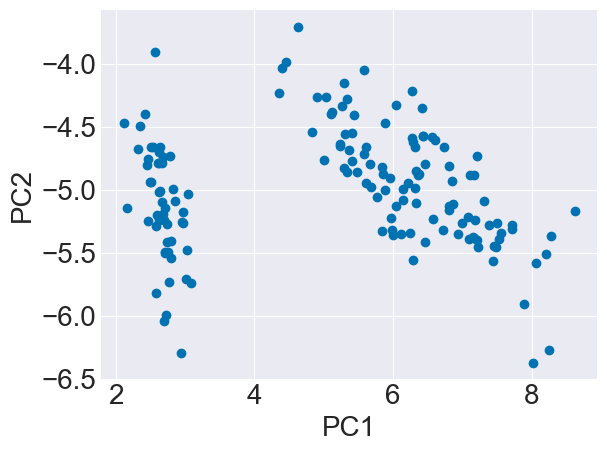

In [165]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = df_numeric_pca.pca_project(pcs_to_keep)

plt.plot(iris_proj[:, 0], iris_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

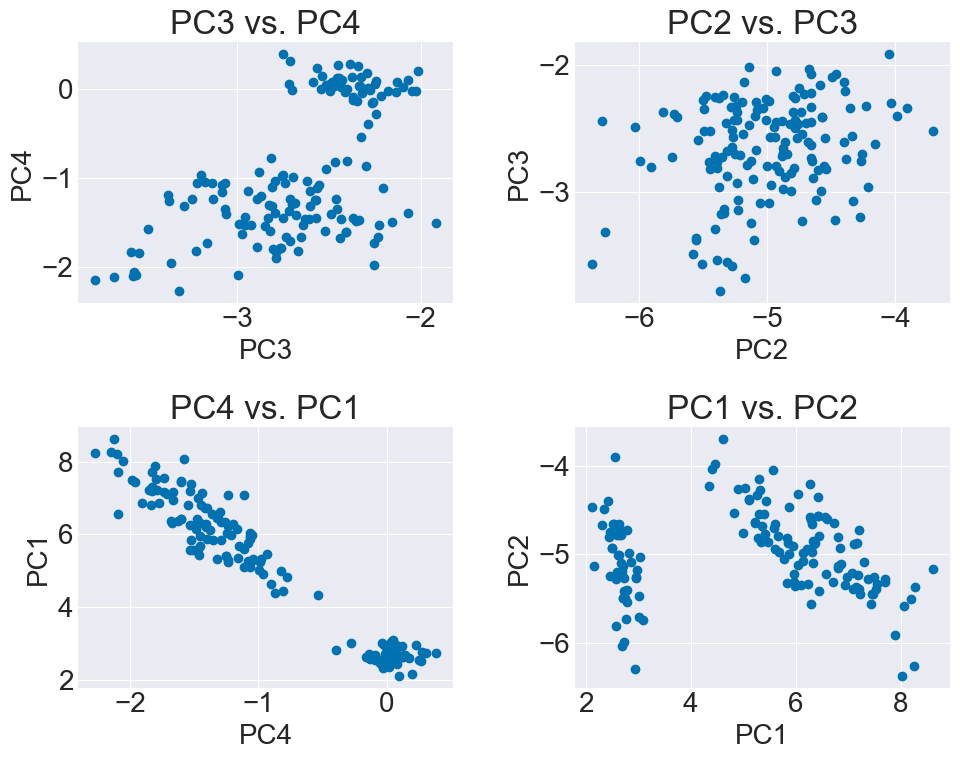

In [166]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
iris_proj34 = df_numeric_pca.pca_project([2,3])
iris_proj23 = df_numeric_pca.pca_project([1,2])
iris_proj41 = df_numeric_pca.pca_project([3,0])
iris_proj12 = df_numeric_pca.pca_project([0,1])



axes[0, 0].scatter(iris_proj34[:, 0], iris_proj34[:, 1])
axes[0, 0].set_xlabel('PC3')
axes[0, 0].set_ylabel('PC4')
axes[0, 0].set_title('PC3 vs. PC4')

axes[0, 1].scatter(iris_proj23[:, 0], iris_proj23[:, 1])
axes[0, 1].set_xlabel('PC2')
axes[0, 1].set_ylabel('PC3')
axes[0, 1].set_title('PC2 vs. PC3')

axes[1, 0].scatter(iris_proj41[:, 0], iris_proj41[:, 1])
axes[1, 0].set_xlabel('PC4')
axes[1, 0].set_ylabel('PC1')
axes[1, 0].set_title('PC4 vs. PC1')

axes[1, 1].scatter(iris_proj12[:, 0], iris_proj12[:, 1])
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].set_title('PC1 vs. PC2')

plt.tight_layout()

plt.show()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** We can see that there is very little correlation between PC3 vs PC4 and PC2 vs PC3 and PC1 vs PC2. This means that these PCs are showing different aspects of variation and we should keep them. However, we can see a clear negative correlation between between PC4 vs PC1, which means we only need one of them to understand the data and no need to keep both.

### 3e. Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

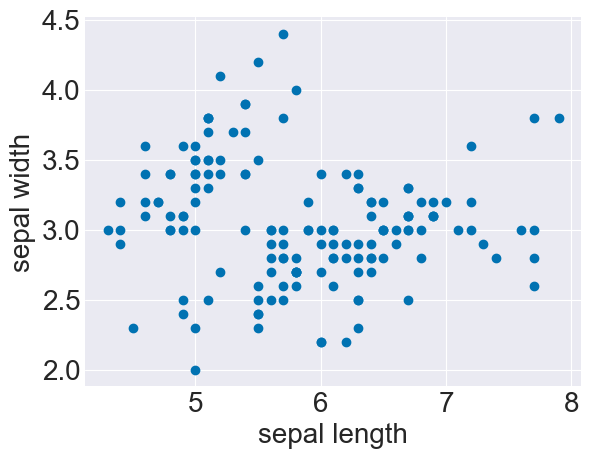

In [167]:
# Plot original iris data
plt.plot(df_numeric['sepalLength'], df_numeric['sepalWidth'], 'o')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

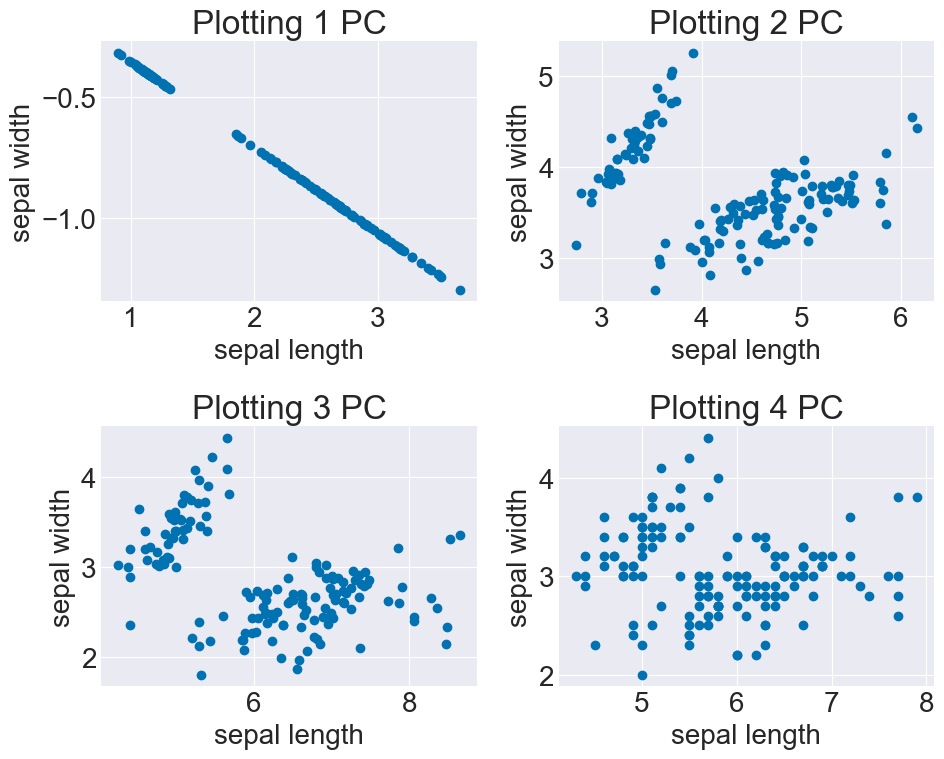

In [168]:
# 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
iris_proj34 = df_numeric_pca.pca_then_project_back(1)
iris_proj23 = df_numeric_pca.pca_then_project_back(2)
iris_proj41 = df_numeric_pca.pca_then_project_back(3)
iris_proj12 = df_numeric_pca.pca_then_project_back(4)

axes[0, 0].scatter(iris_proj34[:, 0], iris_proj34[:, 1],)
axes[0, 0].set_xlabel('sepal length')
axes[0, 0].set_ylabel('sepal width')
axes[0, 0].set_title('Plotting 1 PC')

axes[0, 1].scatter(iris_proj23[:, 0], iris_proj23[:, 1])
axes[0, 1].set_xlabel('sepal length')
axes[0, 1].set_ylabel('sepal width')
axes[0, 1].set_title('Plotting 2 PC')

axes[1, 0].scatter(iris_proj41[:, 0], iris_proj41[:, 1])
axes[1, 0].set_xlabel('sepal length')
axes[1, 0].set_ylabel('sepal width')
axes[1, 0].set_title('Plotting 3 PC')

axes[1, 1].scatter(iris_proj12[:, 0], iris_proj12[:, 1])
axes[1, 1].set_xlabel('sepal length')
axes[1, 1].set_ylabel('sepal width')
axes[1, 1].set_title('Plotting 4 PC')

plt.tight_layout()

plt.show()

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** 1 PC means that its just a linear line and does not preserve much of the original data. 2 and 3 shows clusters and retains much of the original data though there is not a lot of difference between 2 and 3. The 4th one retains all the data since we are plotting all 4 PCs.

The grid shows similar patterns of clustering in every PC plotted, which means the clustering is a fundamental feature of this dataset and should be looked into more.

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure, with respect to the original data axes?

**Question 11:** What do the loadings tell us about correlations among the original data axes?

**Answer 10:** It shows PC1 is mostly influences petalLength and petalWidth, sepalLength is not influenced much by either PCs, and sepalWidth is strongly influenced by PC2


**Answer 11:** It shows that petalLength and petalWidth correlates strongly with each other, sepalWidth does not correlate with those 2 that much, and sepalLength has low correlation with all ther other attributes.

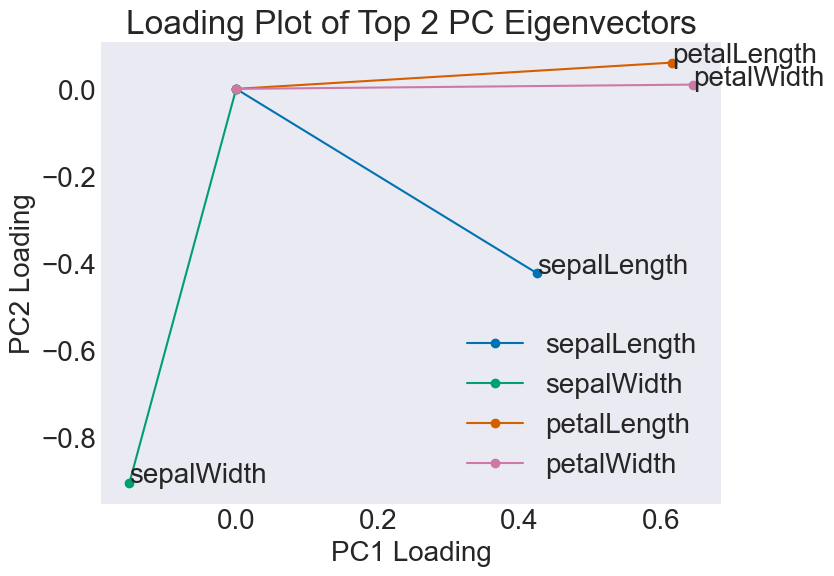

In [169]:
df_numeric_pca.loading_plot()

## Task 4: Eigenfaces — PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a. Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

*More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/*

In [170]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b. Look at the face data

In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

Run the function to create the plot of the faces below.

**Note:**
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

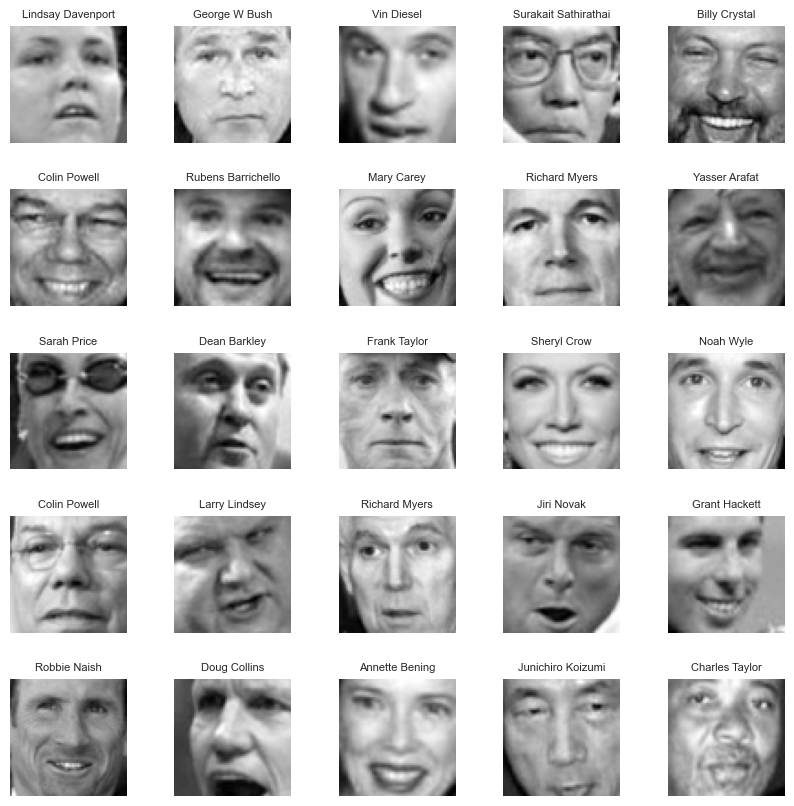

In [171]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    h = 0
    for i in range(5):
        for k in range(5):
            axes[i, k].imshow(face_imgs[h], cmap='gray')
            axes[i, k].set_title(face_names[h], fontsize=8)
            h = h+1
            axes[i, k].set_xticks([])  
            axes[i, k].set_yticks([])
            # print(h)
            # print(i, k)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()
    

face_plot(face_imgs, face_names)

### 4c. Visualize the "mean face"

Take the mean face image across the dataset and show it below.

**Note:** Use the same `cmap` parameter as above and turn off x and y tick marks.

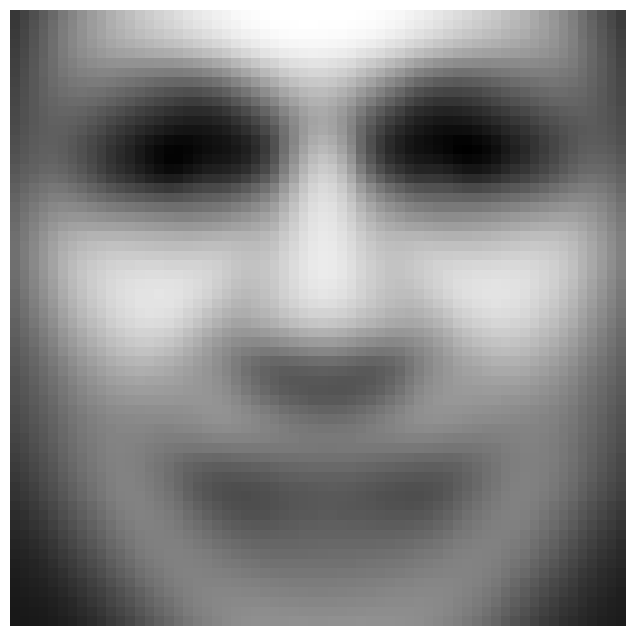

In [172]:
mean_face = np.mean(face_imgs, axis=0)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mean_face, cmap='gray')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

### 4d. Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [173]:
# Your reshape code here
num_samples = face_imgs.shape[0]
num_pixels = face_imgs.shape[1] * face_imgs.shape[2]
face_imgs_vec = face_imgs.reshape(num_samples, num_pixels)

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e. Perform PCA on preprocessed face data

Create pandas DataFrame object that holds the face data then run PCA on the face dataset. The header names of consecutive integers `0, 1, ..., 4095` are fine. For the `vars` parameter in the `pca` method, pass in a Python list of ints (`0, 1, ..., 4095`).

**Note:**
- This is not a "toy" dataset so it might take a few minutes for the PCA to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [174]:
import time
df = pd.DataFrame(face_imgs_vec)
face_imgs_pca = pca.PCA(df)
headers = np.arange(face_imgs_vec.shape[1])
face_imgs_pca.pca(headers, normalize_dataset=True)
start_time = time.time()
elapsed_time = time.time() - start_time

print(f"Time elapsed for PCA: {elapsed_time} seconds")


Time elapsed for PCA: 3.695487976074219e-05 seconds


### 4f. Make face PCA elbow plot

Make an elbow plot of the PCA results.

You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below to **only show a reasonable number of PCs** in order to focus on the curve before it plateaus.

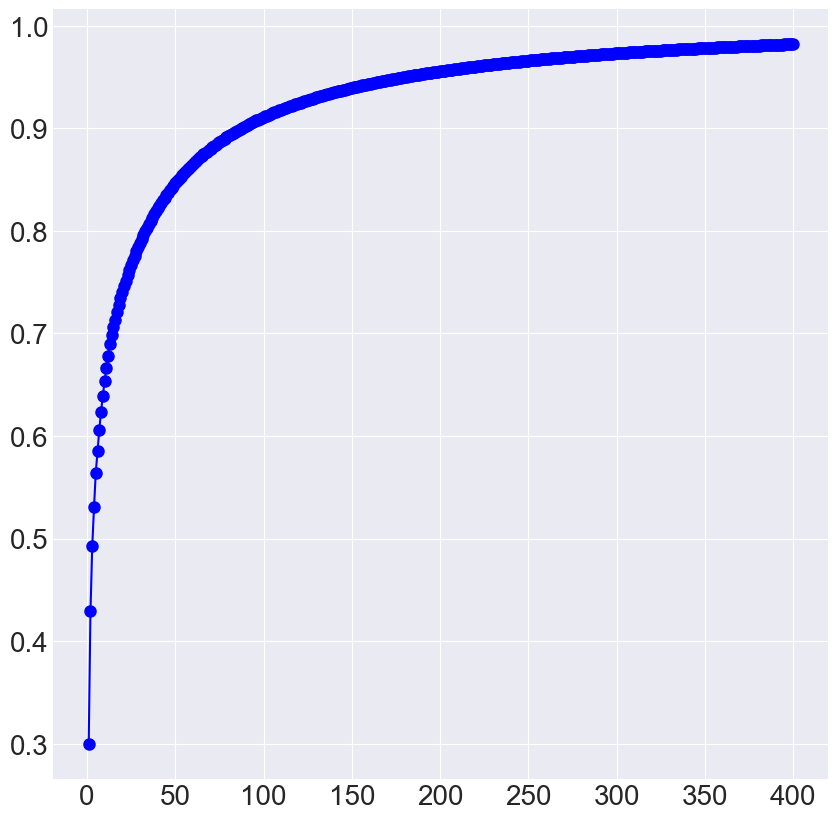

In [175]:
face_imgs_pca.elbow_plot(num_pcs_to_keep=400)
plt.show()

### 4g. Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%

Outline of the general process:
1. For each of the above number of PCs, project them back onto the original data space.
2. Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
3. Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

After using plt.xlim(0, num_pcs_to_keep // 250) to zoom into the first few indices, I found that we need to plot 3 PCs to get 50%, 14 PCs to get 70%, 33 PCs to get 80%, and 190 to get 95%


In [176]:
fifty = face_imgs_pca.pca_then_project_back(3)
seventy = face_imgs_pca.pca_then_project_back(14)
eighty = face_imgs_pca.pca_then_project_back(33)
ninetyfive = face_imgs_pca.pca_then_project_back(190)


In [177]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    num_samples = int(reconstucted_imgs.shape[0])
    print(num_samples)
    num_pixels = int(np.sqrt(reconstucted_imgs.shape[1]))
    new_img = reconstucted_imgs.reshape(num_samples, num_pixels, num_pixels)

    return new_img

#### 50% variance face grid

13231


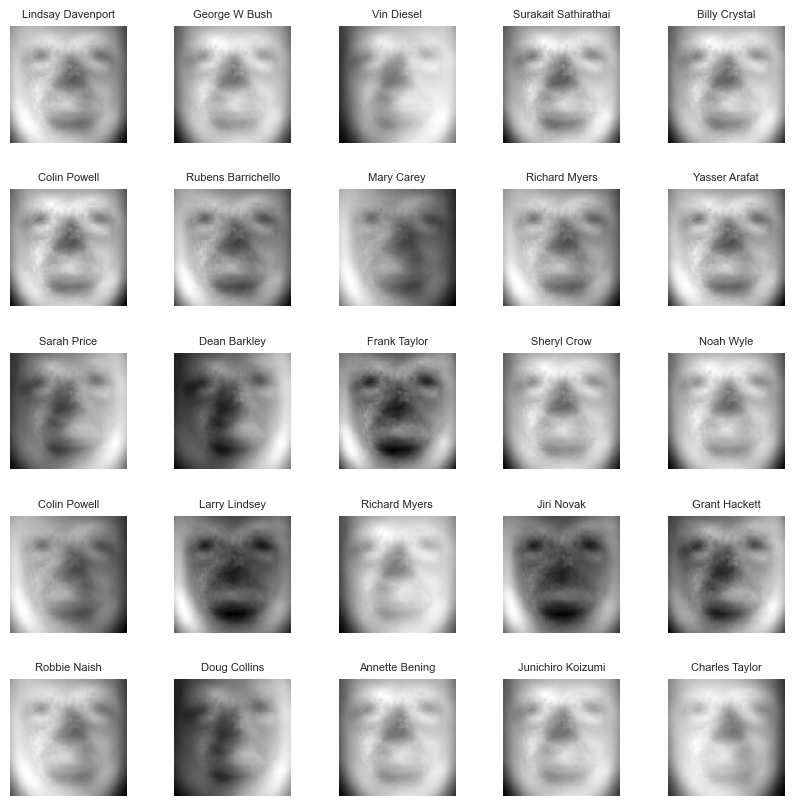

In [178]:
face_plot(make_imgs(fifty), face_names)

#### 70% variance face grid

13231


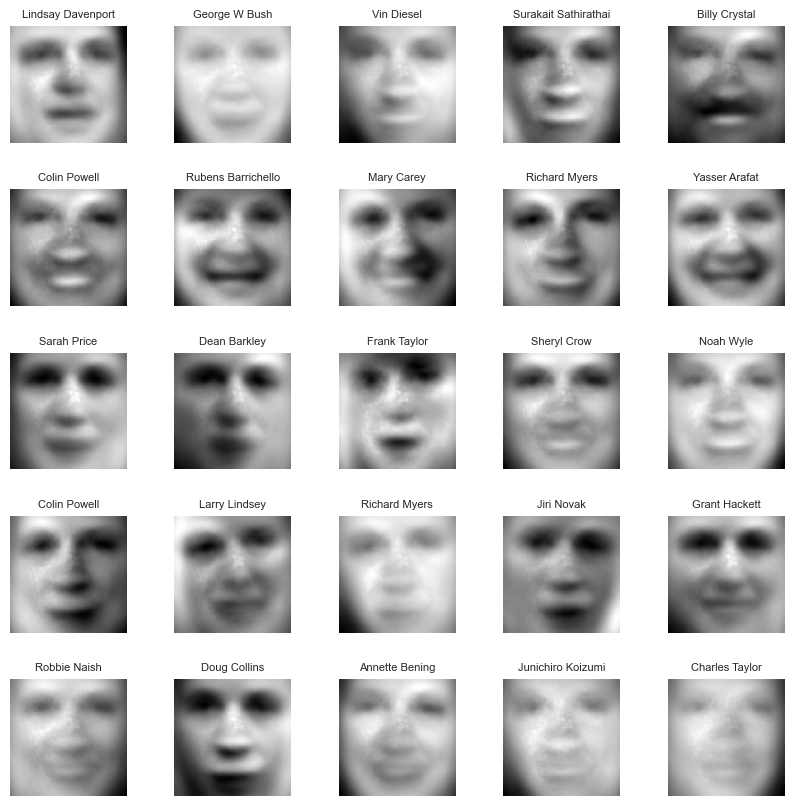

In [179]:
face_plot(make_imgs(seventy), face_names)


#### 80% variance face grid

13231


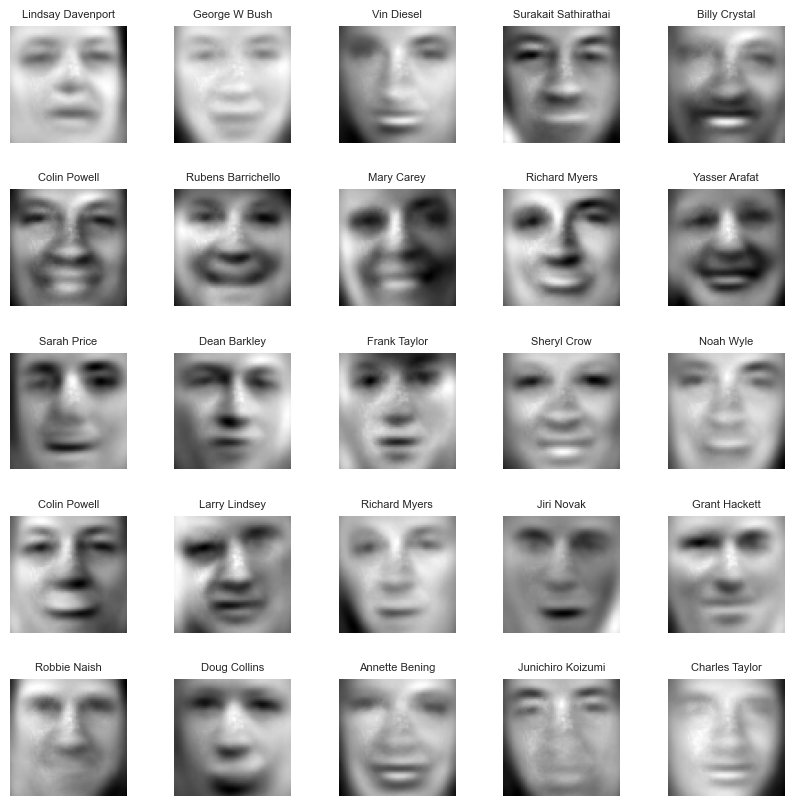

In [180]:
face_plot(make_imgs(eighty), face_names)


#### 95% variance face grid

13231


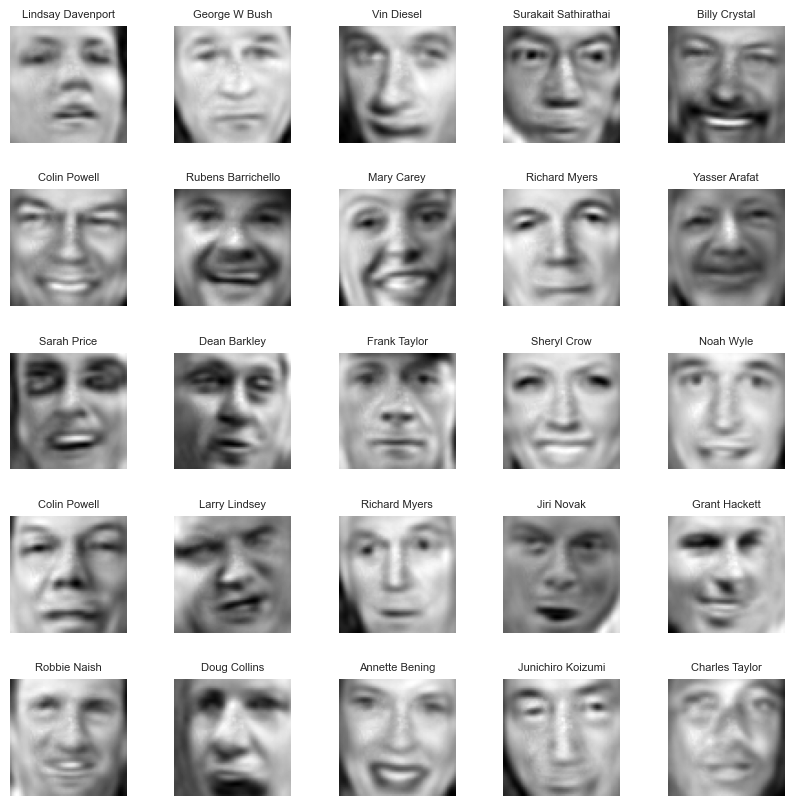

In [181]:
face_plot(make_imgs(ninetyfive), face_names)


### 4h. Questions

**Question 12:** What does the "mean face" image represent?

**Question 13:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Answer 12:** The "mean face" represents the most basic features of human face, where most people would have all of these features in common.

**Answer 13:** When we plot 50% of the face, everyone looks indistinguishable because its just generic features that everyone has. As we reconstruct the face with more data and more features, the differences between the people (their features) becomes more apparent. At 95% we can pretty much recognize who the person is since now most of the features are reconstructed.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, loading plot, etc) to inform your analysis and exploration. 

For this extension, I am using the Job satisfaction - Socio-economic indicators dataset: https://www.kaggle.com/datasets/osvaldovaldivia/job-satisfaction-socio-economic-indicators

I am looking for correlations between Average working hours, mean net income, financial situation, and average job satisfaction. 

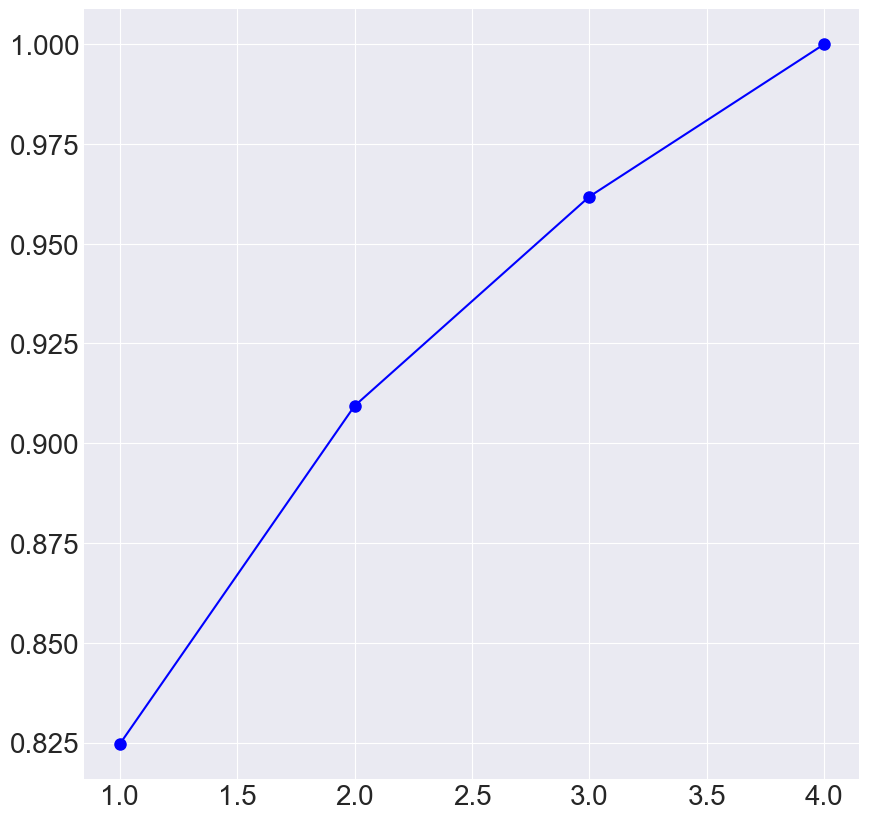

In [182]:
df = pd.read_csv('data/data.csv')


df_work = df[['AVG_WEEKLY_WORKING_HOURS', 'MEAN_NET_INCOME', 'FINANTIAL_SITUATION_RATING', 'AVG_JOB_SATISFACTION']]
# print(df_work)
df_work = df_work.dropna(axis=0) 
df_work_pca = pca.PCA(data=df_work)
headers = list(df_work.columns)
df_work_pca.pca(headers, normalize_dataset=True)
df_work_pca.elbow_plot()
plt.show()

We can see that 2PCs are enough to show more than 90% of the dataset, so I will look at 2PC first.

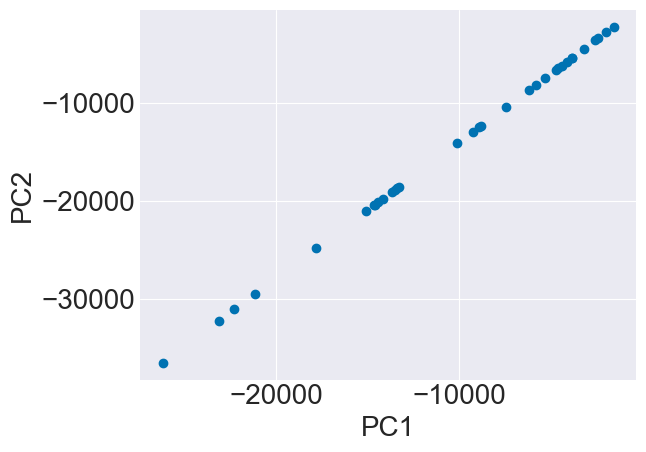

In [183]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
work_proj = df_work_pca.pca_project(pcs_to_keep)

plt.plot(work_proj[:, 0], work_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Now, I look at how PCs relate with each other through this 2x2 graph

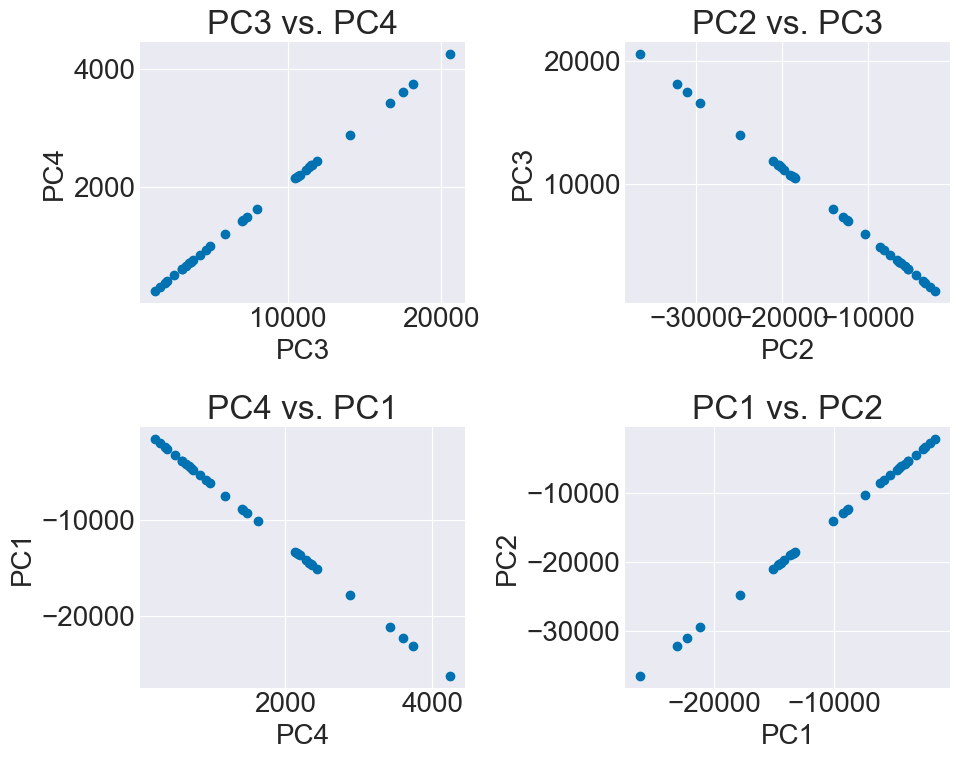

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
work_proj34 = df_work_pca.pca_project([2,3])
work_proj23 = df_work_pca.pca_project([1,2])
work_proj41 = df_work_pca.pca_project([3,0])
work_proj12 = df_work_pca.pca_project([0,1])



axes[0, 0].scatter(work_proj34[:, 0], work_proj34[:, 1])
axes[0, 0].set_xlabel('PC3')
axes[0, 0].set_ylabel('PC4')
axes[0, 0].set_title('PC3 vs. PC4')

axes[0, 1].scatter(work_proj23[:, 0], work_proj23[:, 1])
axes[0, 1].set_xlabel('PC2')
axes[0, 1].set_ylabel('PC3')
axes[0, 1].set_title('PC2 vs. PC3')

axes[1, 0].scatter(work_proj41[:, 0], work_proj41[:, 1])
axes[1, 0].set_xlabel('PC4')
axes[1, 0].set_ylabel('PC1')
axes[1, 0].set_title('PC4 vs. PC1')

axes[1, 1].scatter(work_proj12[:, 0], work_proj12[:, 1])
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
axes[1, 1].set_title('PC1 vs. PC2')

plt.tight_layout()

plt.show()

We can see that PC1 and PC2 have positive correlation so we only need to plot 1 of them to see the trend of the data, same goes for PC3 and PC4.

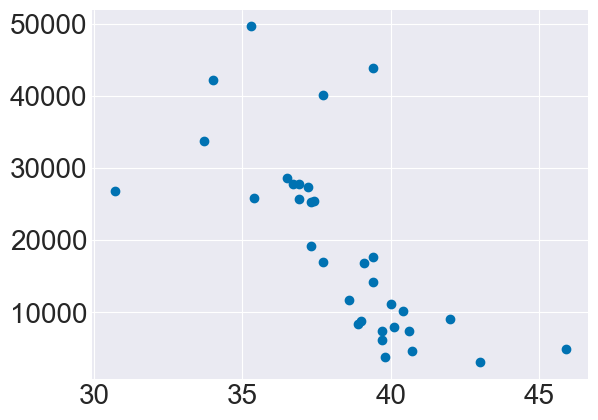

In [185]:
plt.plot(df_work['AVG_WEEKLY_WORKING_HOURS'], df_work['MEAN_NET_INCOME'], 'o')
plt.show()



Then, I look at how plotting the rest of the PCs look against each other.

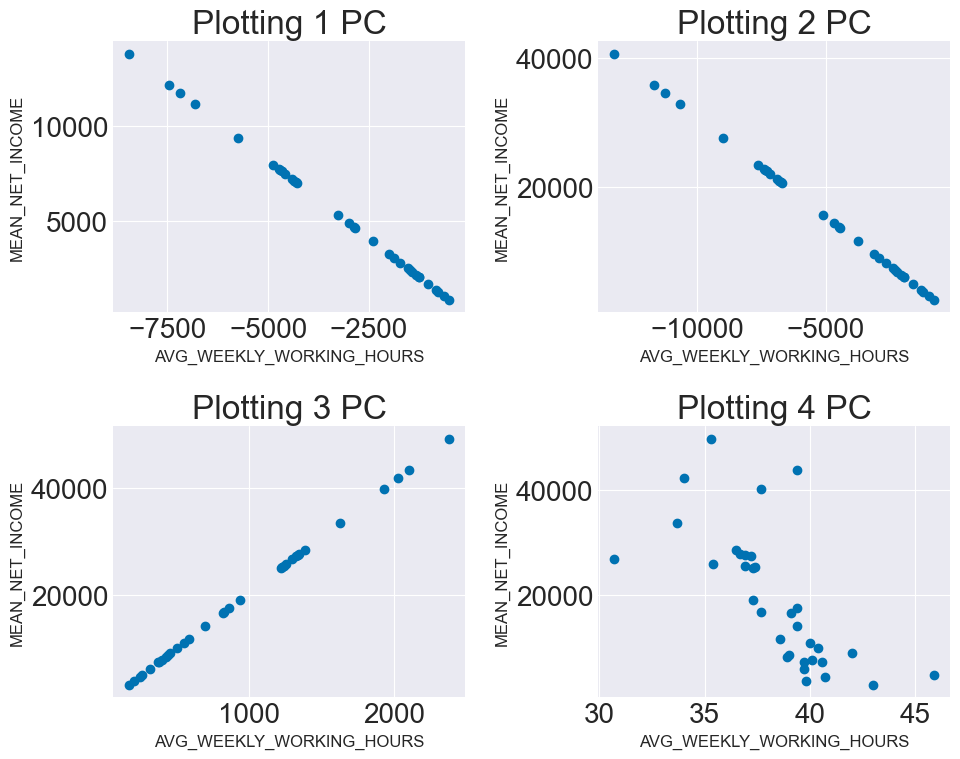

In [186]:
# 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
work_proj34 = df_work_pca.pca_then_project_back(1)
work_proj23 = df_work_pca.pca_then_project_back(2)
work_proj41 = df_work_pca.pca_then_project_back(3)
work_proj12 = df_work_pca.pca_then_project_back(4)

axes[0, 0].scatter(work_proj34[:, 0], work_proj34[:, 1],)
axes[0, 0].set_xlabel('AVG_WEEKLY_WORKING_HOURS', fontsize = 12)
axes[0, 0].set_ylabel('MEAN_NET_INCOME' , fontsize = 12)
axes[0, 0].set_title('Plotting 1 PC')

axes[0, 1].scatter(work_proj23[:, 0], work_proj23[:, 1])
axes[0, 1].set_xlabel('AVG_WEEKLY_WORKING_HOURS' , fontsize = 12)
axes[0, 1].set_ylabel('MEAN_NET_INCOME', fontsize = 12)
axes[0, 1].set_title('Plotting 2 PC')

axes[1, 0].scatter(work_proj41[:, 0], work_proj41[:, 1])
axes[1, 0].set_xlabel('AVG_WEEKLY_WORKING_HOURS', fontsize = 12)
axes[1, 0].set_ylabel('MEAN_NET_INCOME', fontsize = 12)
axes[1, 0].set_title('Plotting 3 PC')

axes[1, 1].scatter(work_proj12[:, 0], work_proj12[:, 1])
axes[1, 1].set_xlabel('AVG_WEEKLY_WORKING_HOURS', fontsize = 12)
axes[1, 1].set_ylabel('MEAN_NET_INCOME', fontsize = 12)
axes[1, 1].set_title('Plotting 4 PC')

plt.tight_layout()

plt.show()

This is very interesting because it tells us that only when we plot 3 PCs, there is a positive correlation between the Mean net income and the average weeekly working hours. It's possible that working hours and mean net income interact with whichever the 3rd PC represents in a very complex way. 

Case 1:People with both high working hours and high financial satisfaction may experience a positive correlation with income.

Case 2 :The positive correlation may indicate that individuals who are more satisfied with their jobs can achieve higher income levels even with longer working hours. This could mean that people who enjoy their work and are satisfied with their jobs are more motivated and productive, leading to better financial outcomes.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

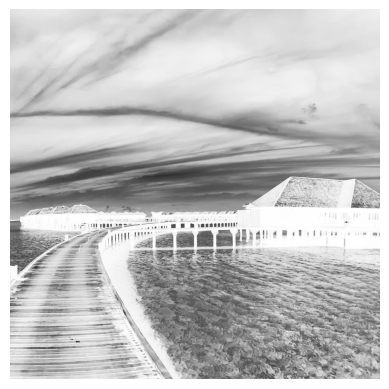

In [187]:
from PIL import Image
from numpy import asarray
 
 
img = Image.open('data/sample.jpg').convert('L')
 
image = asarray(img)
# print(image)
min_dim = min(image.shape[0], image.shape[1])
square_image = image[:min_dim, :min_dim]
# print(square_image.shape)

image_pca = pca.PCA(data=square_image)
image_pca.pca(vars=None, normalize_dataset=True)
plt.imshow(square_image)
plt.axis('off')
plt.grid(False)
plt.show()

 


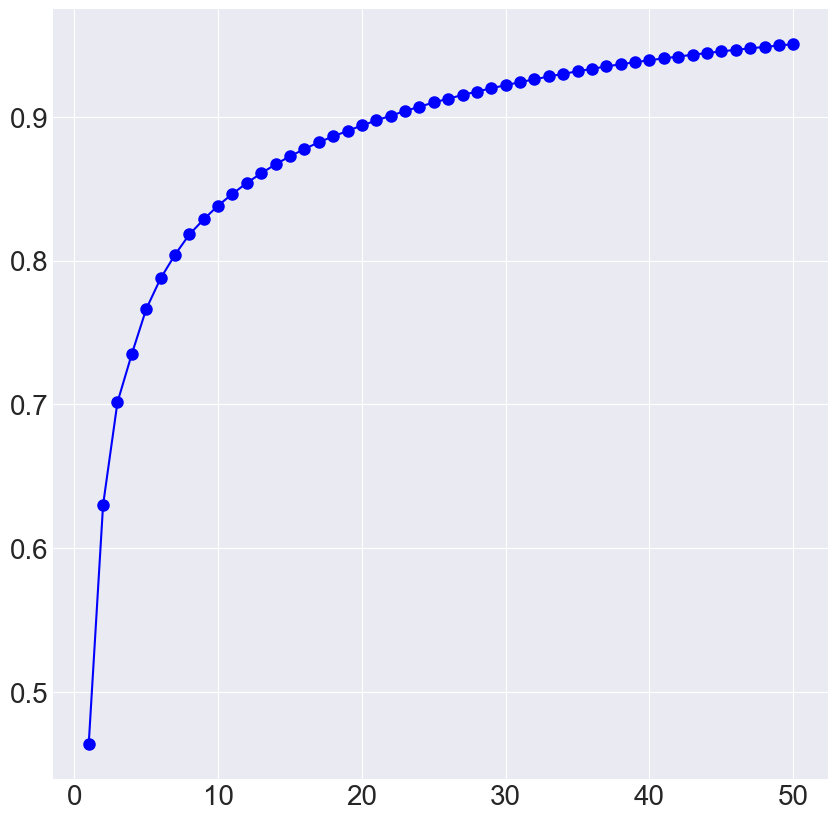

In [188]:
image_pca.elbow_plot(num_pcs_to_keep=50)

From the elbow plot, we can see that the with just 20 PCs we can reconstruct over 90% of the image

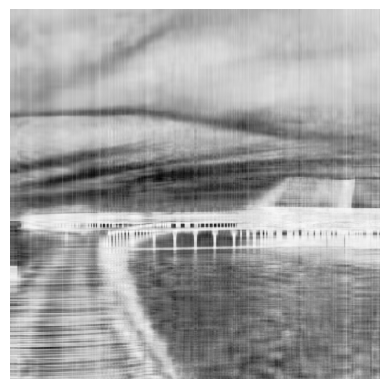

In [189]:
ninety = image_pca.pca_then_project_back(20)
plt.imshow(ninety)
plt.axis('off')
plt.grid(False)
plt.show()

I calculate construction error using the Root Mean Squared Error (or normalised RMSE) from this answer: https://stats.stackexchange.com/questions/194278/meaning-of-reconstruction-error-in-pca-and-lda

In [190]:
squared_error = (ninety - square_image) ** 2
mse = np.mean(squared_error)
rmse = np.sqrt(mse)
nrmse = rmse/np.sqrt(np.mean(image**2))
print(nrmse)

1.6006187896086153


So with a 20 PCs reconstruction, I got a nrmse of 1.6, lets compare it to some other nrmse.

In [191]:
def nrmse(pc, og):
    squared_error = (pc - og) ** 2
    mse = np.mean(squared_error)
    rmse = np.sqrt(mse)
    nrmse = rmse/np.sqrt(np.mean(og**2))
    rounded_nrmse = round(nrmse, 2)
    return rounded_nrmse

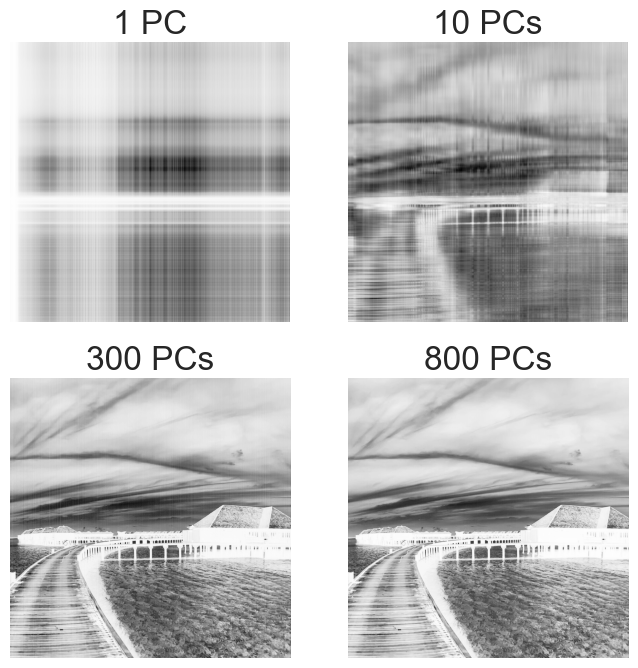

In [192]:
plt.figure(figsize=(8, 8))

one = image_pca.pca_then_project_back(1)
plt.subplot(2, 2, 1)
plt.imshow(one)
plt.title('1 PC')
plt.axis('off')

ten = image_pca.pca_then_project_back(10)
plt.subplot(2, 2, 2)
plt.imshow(ten)
plt.title('10 PCs')
plt.axis('off')

three_hundred = image_pca.pca_then_project_back(300)
plt.subplot(2, 2, 3)
plt.imshow(three_hundred)
plt.title('300 PCs')
plt.axis('off')

eight_hundred = image_pca.pca_then_project_back(800)
plt.subplot(2, 2, 4)
plt.imshow(eight_hundred)
plt.title('800 PCs')
plt.axis('off')

plt.show()


We can see that the 300 PCs image and the 800 PCs image are identical, but the one with 20 PCs, though we can see whats in the image, there are still distortions. So depending on the use case, we can decide between the 20 PCs and the 300 PCs and there is no need to go as far as 800.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

For this extension, I will be trying to recognize Bryan Cranston's face, first step is to preprocess

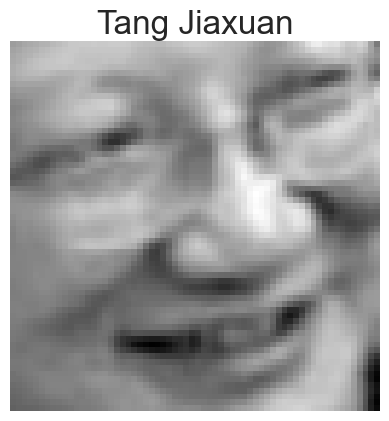

In [193]:
query_image =  face_imgs[190]
plt.imshow(query_image, cmap='gray')
plt.axis('off')
plt.title(face_names[190])
plt.show()



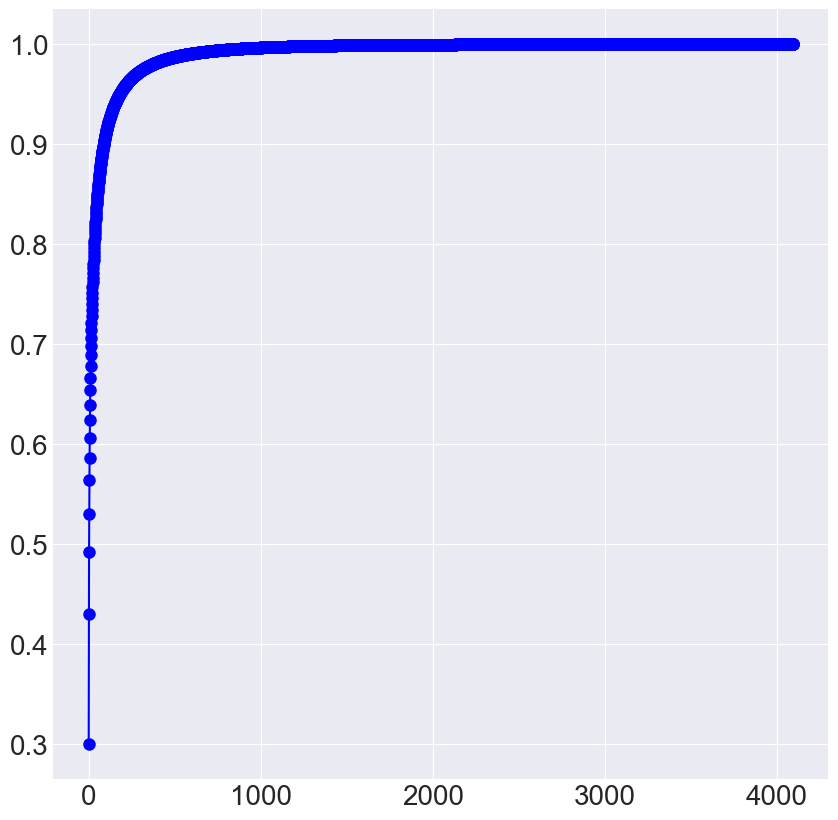

In [194]:
face_imgs_pca.elbow_plot()
plt.show()


Now to perform projection on individual images and add them to the PCA space:

In [195]:
pca_space = []
for individual in face_imgs: 
    # print(individual)
    individual = individual.reshape(1, 4096)
    vector = np.dot(individual.data, face_imgs_pca.e_vecs)
    pca_space.append(vector)

Now I calculate the distance

In [196]:
def match(query_image):
    query_proj = np.dot(query_image.reshape(1, 4096), face_imgs_pca.e_vecs) 
    threshold = 1000
    match = False
    for vector in pca_space:
        distance = np.linalg.norm(query_proj - vector)
        # print(distance)
        if distance < threshold: 
            print(distance)
            match = True
    return match   
        

match(query_image)

0.0


True

Here I am testing with an image that is not in the database.

In [197]:
image_path = 'data/walter.jpeg'
img_walter = Image.open(image_path).convert('L')
new_size = (64, 64)
img_walter = img_walter.resize(new_size)

img_walter_np = np.array(img_walter)

match(img_walter_np) #False

False

Testing with the query image that is in the database

In [198]:
match(face_imgs[1240]) #True

0.0


True

Testing with another one that is not in the database

In [199]:
image_path = 'data/hank.jpeg'
img_hank = Image.open(image_path).convert('L')
new_size = (64, 64)
img_hank = img_hank.resize(new_size)

img_hank_np = np.array(img_hank)

match(img_hank_np) #False

False